In [1]:
import sys
sys.path.append("../lib/")
import os
import numpy as np
import pandas as pd
from natsort import natsorted, ns
from pathlib import Path

import matplotlib.pyplot as plt

from raman_lib.opus_converter import convert_opus
from raman_lib.misc import load_data
from raman_lib.visualization import plot_spectra_peaks

In [2]:
data = pd.read_csv("../data/L_540_2022_C_E.csv")

X = data.loc[:, ~data.columns.isin(["label", "file"])]

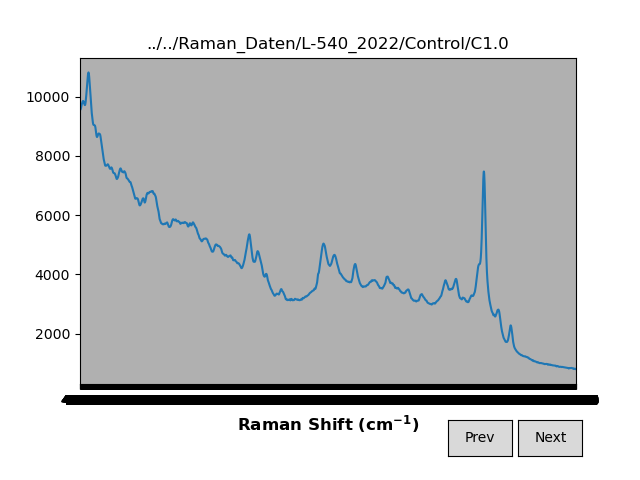

In [3]:
%matplotlib widget

plot_spectra_peaks(X.columns, 
                   X.values,
                   labels=data.file)

In [15]:
import os


path = Path("../../../Raman_Daten/L-540_2022/Etoposide/")
j = 0
last_num = 0
for i, file in enumerate(natsorted(path.iterdir(), alg=ns.PATH)):
    if not file.stem.endswith(str(last_num)):
        j = 0
    os.rename(file, file.with_suffix(f".{j}"))

    j += 1
    last_num = file.stem[-1]